<a href="https://colab.research.google.com/github/Msswamycreate/machine-learning-projects/blob/master/ML_Internship_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**problem statement**

The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

**Data**

The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

**Attribute Information**

● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?

**Objective:**

The classification goal is to predict the likelihood of a liability customer buying personal
loans.

#importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer


%matplotlib inline

#importing data


In [ ]:
#upload bank-Personal_Loan_modelling.xlsx file
from google.colab import files
files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


{'Bank_Personal_Loan_Modelling.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\x12\x18\xde\xddd\x01\x00\x00\x18\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
#reading data excel sheet
data=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')

#checking datatype, statistical summary, shape, null values etc

In [ ]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Data cleaning**
#checking for null values

In [ ]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

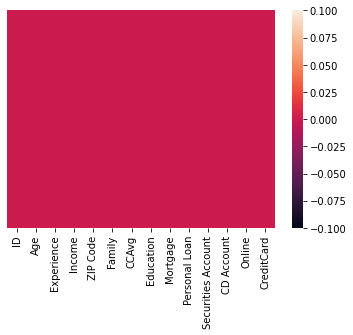

In [ ]:
#plotting heatmap for null values
sns.heatmap(data.isnull(),yticklabels=False)

From the heat map we can say their is no null values

#Droping unwanted colums

In [ ]:
#id is unique number for each customer so we can treat it as noise and drop it
data.drop('ID',axis=1,inplace=True)

In [ ]:
#checking corelation of age and experience
experience=data['Experience']
age=data['Age']
correlation=experience.corr(age)
correlation

0.9942148569683321

In [ ]:
#experience colum contains faulty data so after checking correlation we can drop it
data.drop('Experience',axis=1,inplace=True)

In [ ]:
#zip code is nothing but address it wont affect our output so we can drop it
data.drop('ZIP Code',axis=1,inplace=True)

#After removing unwanted colums checking statistical summary

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   int64  
 5   Mortgage            5000 non-null   int64  
 6   Personal Loan       5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [ ]:
data.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#EDA

**value count of entire data**

In [ ]:
data.apply(pd.value_counts).fillna(0)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0.0,0.0,0.0,0.0,106.0,0.0,3462.0,4520.0,4478.0,4698.0,2016.0,3530.0
0.1,0.0,0.0,0.0,183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.2,0.0,0.0,0.0,204.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.3,0.0,0.0,0.0,241.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.4,0.0,0.0,0.0,179.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
590.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
601.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
612.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
617.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#number of uniques in each colum

In [ ]:
#unique value in age
data.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

#Number of people with zero mortgage?

In [ ]:
#from this we get to know that the number of people with zero mortage is 3462
pd.value_counts(data['Mortgage'].values)

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Length: 347, dtype: int64

#Number of people with zero credit card spending per month

In [ ]:
#from this we get to know that the number of people with zero credit card spending per month is 3530
pd.value_counts(data['CreditCard'].values)

0    3530
1    1470
dtype: int64

#value count of all categorical colums

In our data catogorical colums are Personal Loan , Securities Account , CD Account , Online , CreditCard

In [ ]:
pd.value_counts(data['Personal Loan'].values)

0    4520
1     480
dtype: int64

In [ ]:
pd.value_counts(data['Securities Account'].values)

0    4478
1     522
dtype: int64

In [ ]:
pd.value_counts(data['CD Account'].values)

0    4698
1     302
dtype: int64

In [ ]:
pd.value_counts(data['Online'].values)

1    2984
0    2016
dtype: int64

In [ ]:
pd.value_counts(data['CreditCard'].values)

0    3530
1    1470
dtype: int64

#Univariate and Bivariate analysis
we are doing data analysis using data visualization

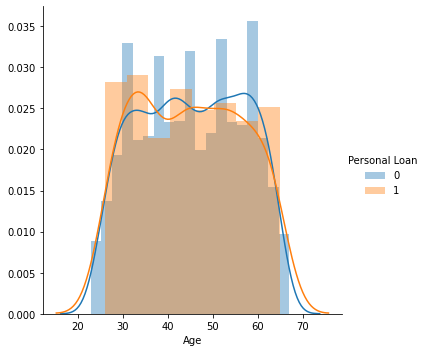

In [ ]:
#univariate analysis using dist plot
sns.FacetGrid(data,hue='Personal Loan',height=5).map(sns.distplot,'Age').add_legend()







**Observation**
From the above graph we can say that the graph is almost bell like and the data is normally distributed

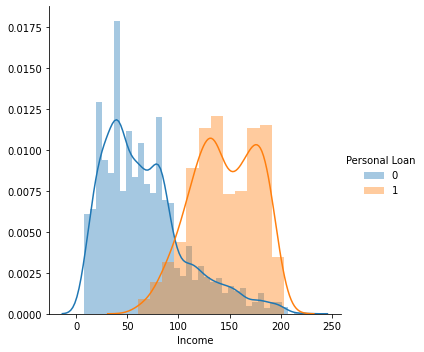

In [ ]:
#univariate analysis using dist plot
sns.FacetGrid(data,hue='Personal Loan',height=5).map(sns.distplot,'Income').add_legend()

**Observation** Fom the above graph we observe the righ sided skewness

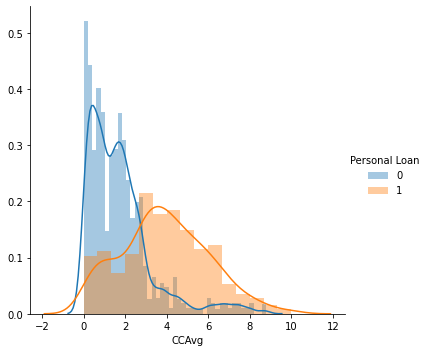

In [ ]:
#univariate analysis using dist plot
sns.FacetGrid(data,hue='Personal Loan',height=5).map(sns.distplot,'CCAvg').add_legend()

**Observation** From the above graph we can observe that the CC Avg also right sided skewess

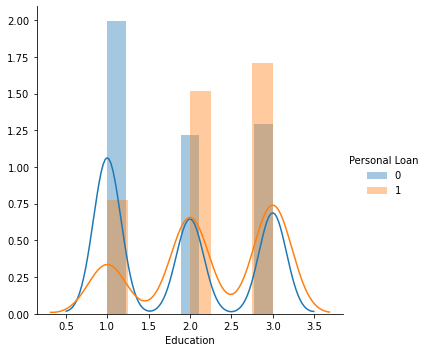

In [ ]:
#univariate analysis using dist plot
sns.FacetGrid(data,hue='Personal Loan',height=5).map(sns.distplot,'Education').add_legend()

**Observation** From the above graph we can say that the people having more education like level 2 and level 3 has got loan in previous time that means people with good education has taken the loan

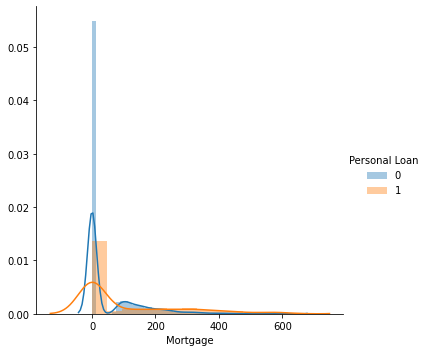

In [ ]:
#univariate analysis using dist plot
sns.FacetGrid(data,hue='Personal Loan',height=5).map(sns.distplot,'Mortgage').add_legend()

**Observation** From the above graph we can say that mortgage also has some right sided skewness


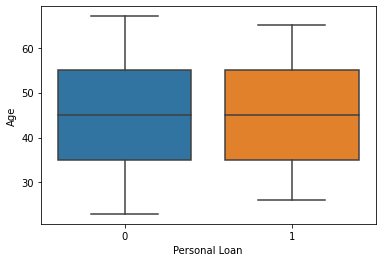

In [ ]:
#bivariate analysis using box plot
sns.boxplot(x='Personal Loan',y='Age',data=data)

**Observation** From the above graph we can say that the people with age 35 to 55 has taken loan 



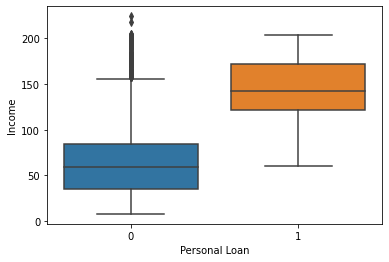

In [ ]:
#bivariate analysis using box plot
sns.boxplot(x='Personal Loan',y='Income',data=data)


**Observation** From the above graph we can say that the people with Income 125 to 175 has taken loan that means people with higher income has taken loan

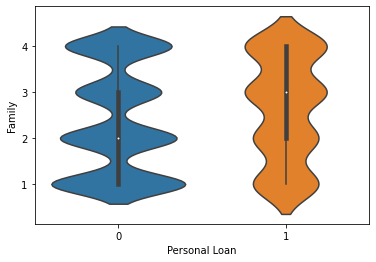

In [ ]:
#bivariate analysis using violin plot
sns.violinplot(x='Personal Loan',y='Family',data=data)

**Observation** from the above graph we can say that almost people with 1 to 4 members in a family as taken loan previous time

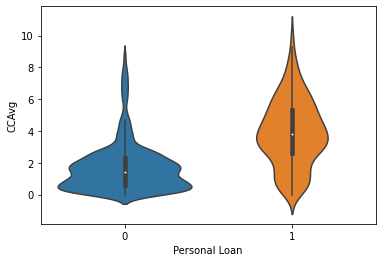

In [ ]:
#bivariate analysis using violin plot
sns.violinplot(x='Personal Loan',y='CCAvg',data=data)

**Observation** from the above graph we can say that almost people with ccavg 2 to 7  as taken loan previous time

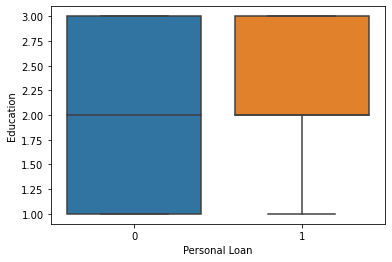

In [ ]:
#bivariate analysis using box plot
sns.boxplot(x='Personal Loan',y='Education',data=data)



**Observation** from the above graph we can say that almost people with Education level 2 to level 3 as taken loan previous time

#Bivariate analysis of Catogorical variables using bar graph

<BarContainer object of 5000 artists>

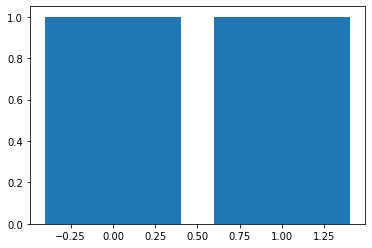

In [ ]:
plt.bar(data['Securities Account'],data['Personal Loan'])

<BarContainer object of 5000 artists>

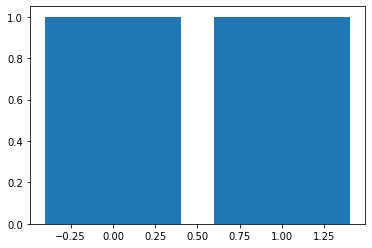

In [ ]:
plt.bar(data['CD Account'],data['Personal Loan'])

<BarContainer object of 5000 artists>

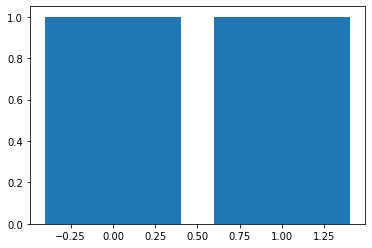

In [ ]:
plt.bar(data['Online'],data['Personal Loan'])

<BarContainer object of 5000 artists>

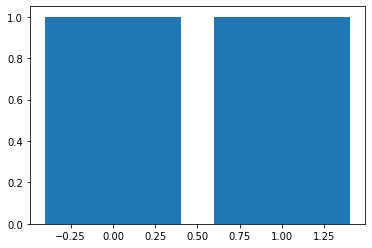

In [ ]:
plt.bar(data['CreditCard'],data['Personal Loan'])

**FROM THE ALL  ABOVE BAR GRAPH WE CAN SAY 50% OF PEOPLE HAVING SECURITIES AND CD ACCOUNT AND also 50% OF PEOPLE USING ONLINE AND CREDICT CARD HAS TAKEN LOAN PREVIOUS TIME**

#MULTIVARIATE ANALYSIS USING PAIRPLOT

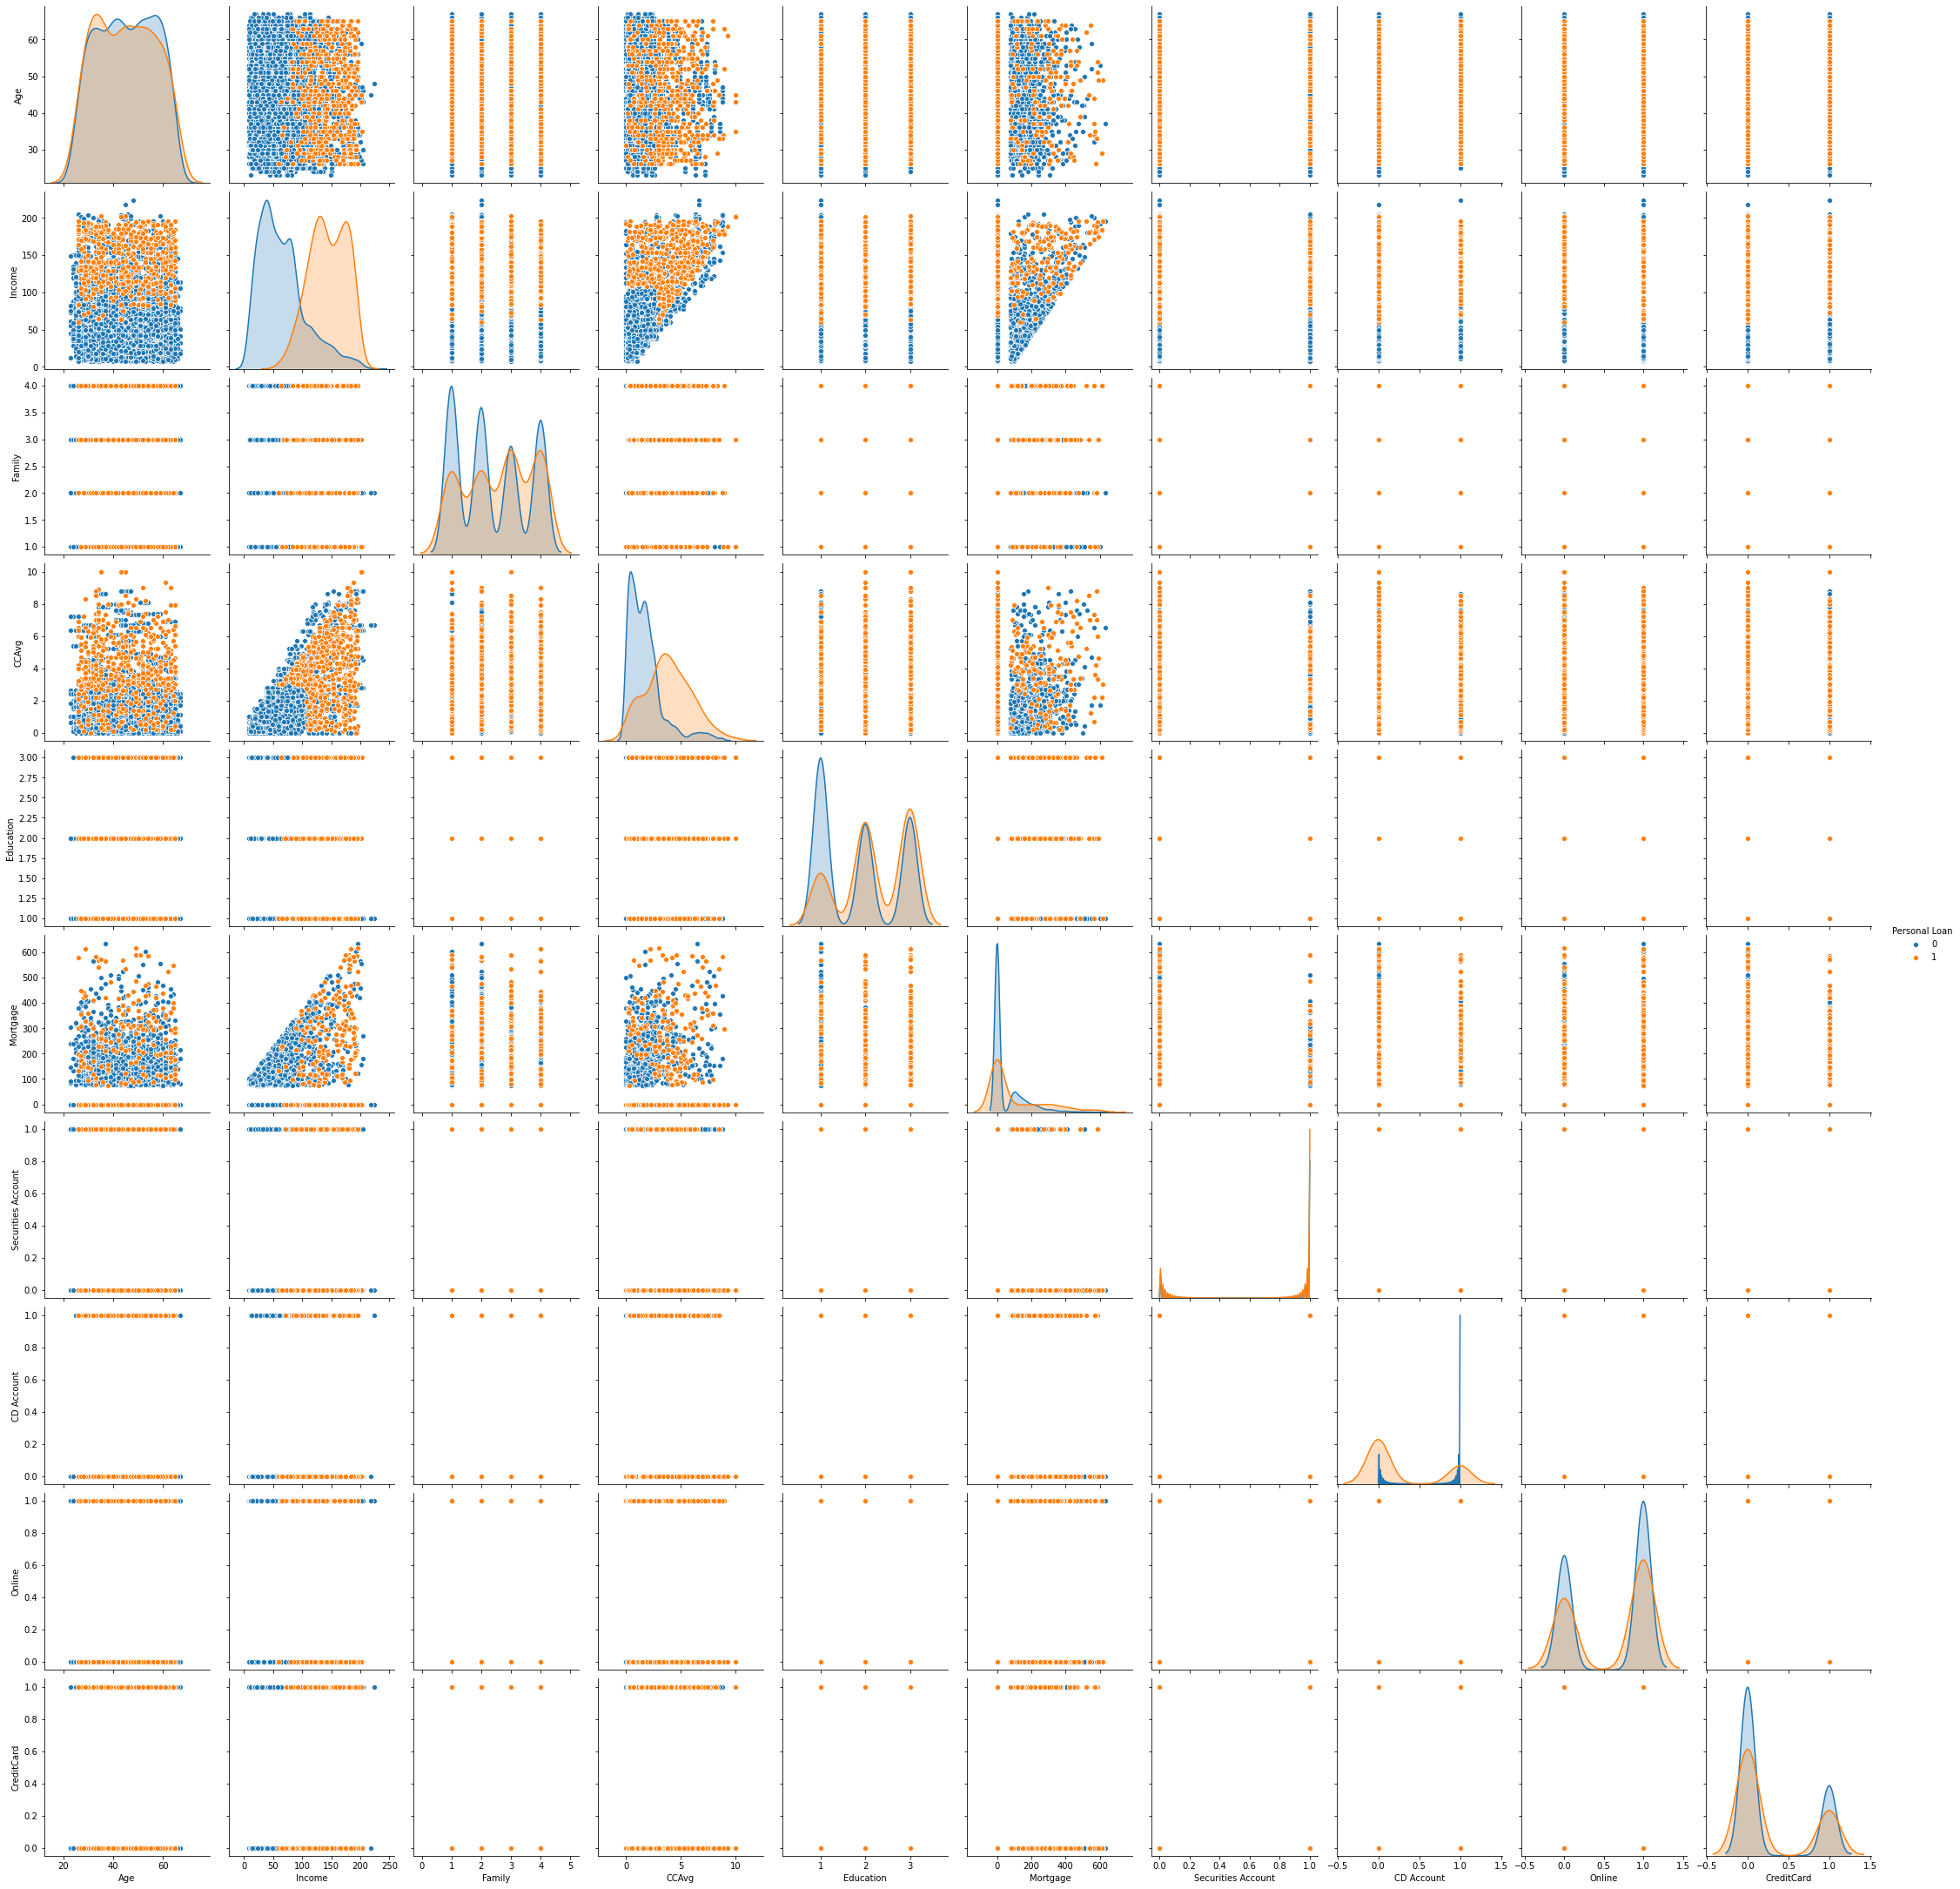

In [ ]:
sns.pairplot(data,hue='Personal Loan',height=3)

#Corelation plot

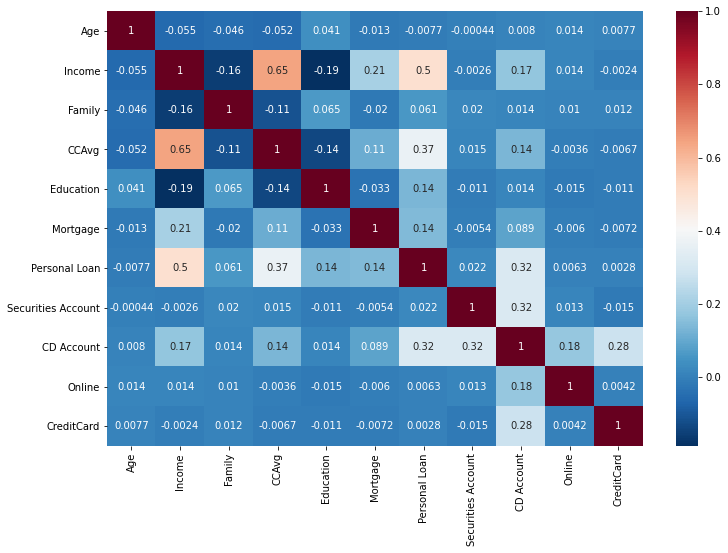

In [ ]:
fig,ax = plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(),cmap="RdBu_r",annot=True)

**Observation**: from the above heat map we can say education and mortgage are corelated and also personal loan and securities account are corelated

Checking skewness of entitre data

In [ ]:
#finding skewness of entire data using pandas .skew method
skewdata=data.skew().sort_values(ascending=False)
skewness=pd.DataFrame({'skew':skewdata})
print(skewness)

                        skew
CD Account          3.691714
Personal Loan       2.743607
Securities Account  2.588268
Mortgage            2.104002
CCAvg               1.598457
CreditCard          0.904589
Income              0.841339
Education           0.227093
Family              0.155221
Age                -0.029341
Online             -0.394785


#Apllying transformation to skewed data
here skewed datas are like income CCAvg etc

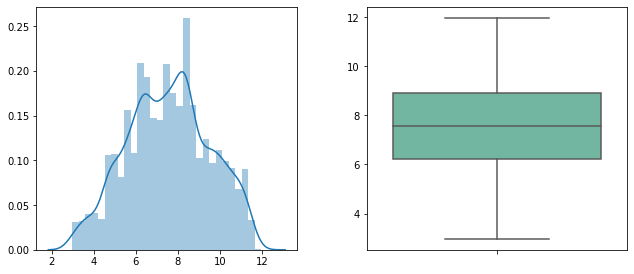

In [ ]:
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data["Income"].values.reshape(-1, 1))

temp = pt.transform(data["Income"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(temp, ax=axes[0]);
sns.boxplot(temp, orient="v", palette="Set2", ax=axes[1])
fig.tight_layout(pad=5.0)

From the above graph we can sew now the income is normally distributed

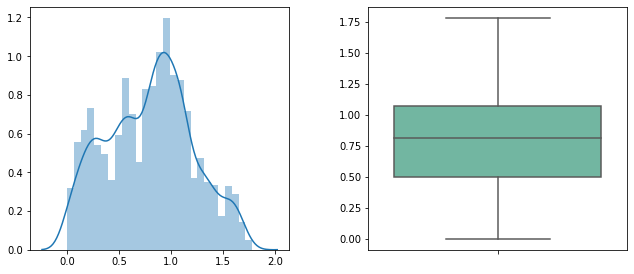

In [ ]:
pt = PowerTransformer(method="yeo-johnson", standardize=False)
pt.fit(data["CCAvg"].values.reshape(-1, 1))

temp = pt.transform(data["CCAvg"].values.reshape(-1, 1))

fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(temp, ax=axes[0]);
sns.boxplot(temp, orient="v", palette="Set2", ax=axes[1])
fig.tight_layout(pad=5.0)

From the above graph we can sew now the CCAvg is normally distributed

#After transformation 

#splitting data into input and output

In [ ]:
data_Y=data['Personal Loan']
data_Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [ ]:
data.drop('Personal Loan',axis=1,inplace=True)

In [ ]:
data_X=data
data_X.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1


In [ ]:
#mortgage contains nominal data we are converting it to ordinal
data_X['Mortgage_Int'] = pd.cut(data_X['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
data_X.drop('Mortgage',axis=1,inplace=True)

In [ ]:
#after seperating input checking the statical summary of data_x
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Income              5000 non-null   int64   
 2   Family              5000 non-null   int64   
 3   CCAvg               5000 non-null   float64 
 4   Education           5000 non-null   int64   
 5   Securities Account  5000 non-null   int64   
 6   CD Account          5000 non-null   int64   
 7   Online              5000 non-null   int64   
 8   CreditCard          5000 non-null   int64   
 9   Mortgage_Int        5000 non-null   category
dtypes: category(1), float64(1), int64(8)
memory usage: 356.9 KB


In [ ]:
data_X.describe()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,1.937913,1.881000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,1.147663,1.747666,0.839869,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,2.500000,3.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,4.000000,10.000000,3.000000,1.000000,1.00000,1.000000,1.000000


#Normalizing data using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_names=data_X.columns
data_X[col_names] = scaler.fit_transform(data_X.values)
data_X

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,-1.774417,-0.538229,1.397414,-0.193371,-1.049078,2.928915,-0.25354,-1.216618,-0.645314,-0.478971
1,-0.029524,-0.864109,0.525991,-0.250595,-1.049078,2.928915,-0.25354,-1.216618,-0.645314,-0.478971
2,-0.552992,-1.363793,-1.216855,-0.536720,-1.049078,-0.341423,-0.25354,-1.216618,-0.645314,-0.478971
3,-0.901970,0.569765,-1.216855,0.436103,0.141703,-0.341423,-0.25354,-1.216618,-0.645314,-0.478971
4,-0.901970,-0.625130,1.397414,-0.536720,0.141703,-0.341423,-0.25354,-1.216618,1.549632,-0.478971
...,...,...,...,...,...,...,...,...,...,...
4995,-1.425438,-0.733757,-1.216855,-0.021696,1.332484,-0.341423,-0.25354,0.821951,-0.645314,-0.478971
4996,-1.338194,-1.276892,1.397414,-0.880069,-1.049078,-0.341423,-0.25354,0.821951,-0.645314,-0.478971
4997,1.540880,-1.081363,-0.345432,-0.937294,1.332484,-0.341423,-0.25354,-1.216618,-0.645314,-0.478971
4998,1.715370,-0.538229,0.525991,-0.822844,0.141703,-0.341423,-0.25354,0.821951,-0.645314,-0.478971


In [ ]:
# after normalization checking the statistical summary
data_X.describe()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,1.939449e-16,7.850609e-16,1.245670e-17,-6.315837e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16,1.365574e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-1.428969e+00,-1.216855e+00,-1.108969e+00,-1.049078e+00,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-4.789715e-01
25%,-9.019702e-01,-7.554825e-01,-1.216855e+00,-7.083945e-01,-1.049078e+00,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01,-4.789715e-01
50%,-2.952359e-02,-2.123482e-01,-3.454321e-01,-2.505954e-01,1.417029e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01,-4.789715e-01
75%,8.429230e-01,5.263146e-01,5.259909e-01,3.216535e-01,1.332484e+00,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00,6.852762e-01
max,1.889859e+00,3.263712e+00,1.397414e+00,4.613520e+00,1.332484e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00,6.506515e+00


#spliting the data into training and test set in the ratio of 70:30

In [ ]:
#Splitting the data into training and validation dataset
X_train,X_test,Y_train,Y_test = train_test_split(data_X,data_Y,train_size = 0.7,stratify=data_Y,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(3500, 10)
(1500, 10)
(3500,)
(1500,)


#Logistic Regression model to predict the likelihood of a customer buying personal loans.

In [ ]:
#applying logistic regression model
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,Y_train)
Y_pred1 = logistic_regression.predict(X_train)
Y_pred2 = logistic_regression.predict(X_test)

In [ ]:
#printing confusion matrix 
from sklearn.metrics import confusion_matrix,recall_score,precision_score,roc_auc_score,f1_score
matrix = confusion_matrix(Y_test,Y_pred2)
print(matrix)

[[1337   19]
 [  54   90]]


Text(0.5, 15.0, 'predicted')

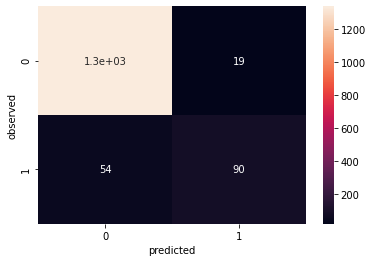

In [ ]:
#plotting heatmap for confusion matrix
sns.heatmap(matrix,annot=True)
plt.ylabel('observed')
plt.xlabel('predicted')

In [ ]:
#printing accuracy of train and test data
print('train accuracy:',metrics.accuracy_score(Y_train,Y_pred1))
print("test accuracy :",metrics.accuracy_score(Y_test,Y_pred2))

train accuracy: 0.952
test accuracy : 0.9513333333333334


In [ ]:
#printing errors of test data
print(' Mean Absolute Error: ', metrics.mean_absolute_error(Y_test,Y_pred2))
print('Recall Score:', recall_score(Y_test,Y_pred2))
print('Precission score',precision_score(Y_test,Y_pred2))
print('ROC score:', roc_auc_score(Y_test,Y_pred2))
print('f1 score',f1_score(Y_test,Y_pred2))

 Mean Absolute Error:  0.048666666666666664
Recall Score: 0.625
Precission score 0.8256880733944955
ROC score: 0.8054941002949852
f1 score 0.7114624505928855


#other classification algorithms

# 1.naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,Y_train)
Y_pred1=nb.predict(X_train)
Y_pred2=nb.predict(X_test)

[[1243  113]
 [  56   88]]


Text(0.5, 15.0, 'predicted')

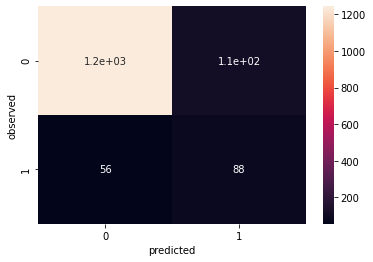

In [ ]:
matrix = confusion_matrix(Y_test,Y_pred2)
print(matrix)
sns.heatmap(matrix,annot=True)
plt.ylabel('observed')
plt.xlabel('predicted')

In [ ]:
print('train accuracy:',metrics.accuracy_score(Y_train,Y_pred1))
print(" test accuracy :",metrics.accuracy_score(Y_test,Y_pred2))
print('Recall Score:', recall_score(Y_test,Y_pred2))
print('Precission score',precision_score(Y_test,Y_pred2))
print('ROC score:', roc_auc_score(Y_test,Y_pred2))
print('f1 score',f1_score(Y_test,Y_pred2))

train accuracy: 0.8805714285714286
 test accuracy : 0.8873333333333333
Recall Score: 0.6111111111111112
Precission score 0.43781094527363185
ROC score: 0.7638888888888888
f1 score 0.5101449275362319


#2.Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=3)
sgd.fit(X_train,Y_train)
Y_pred1=sgd.predict(X_train)
Y_pred2=sgd.predict(X_test)

[[1301   55]
 [  44  100]]


Text(0.5, 15.0, 'predicted')

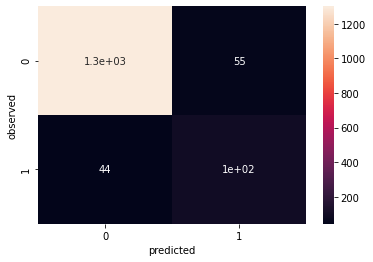

In [ ]:
matrix = confusion_matrix(Y_test,Y_pred2)
print(matrix)
sns.heatmap(matrix,annot=True)
plt.ylabel('observed')
plt.xlabel('predicted')

In [ ]:
print('train accuracy:',metrics.accuracy_score(Y_train,Y_pred1))
print("test accuracy :",metrics.accuracy_score(Y_test,Y_pred2))
print('Recall Score:', recall_score(Y_test,Y_pred2))
print('Precission score',precision_score(Y_test,Y_pred2))
print('ROC score:', roc_auc_score(Y_test,Y_pred2))
print('f1 score',f1_score(Y_test,Y_pred2))

train accuracy: 0.932
test accuracy : 0.934
Recall Score: 0.6944444444444444
Precission score 0.6451612903225806
ROC score: 0.8269419862340216
f1 score 0.668896321070234


#3.K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,Y_train)
Y_pred1=knn.predict(X_train)
Y_pred2=knn.predict(X_test)

[[1353    3]
 [  67   77]]


Text(0.5, 15.0, 'predicted')

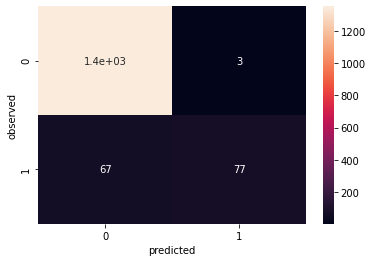

In [ ]:
matrix = confusion_matrix(Y_test,Y_pred2)
print(matrix)
sns.heatmap(matrix,annot=True)
plt.ylabel('observed')
plt.xlabel('predicted')

In [ ]:
print('train accuracy:',metrics.accuracy_score(Y_train,Y_pred1))
print("test accuracy :",metrics.accuracy_score(Y_test,Y_pred2))
print('Recall Score:', recall_score(Y_test,Y_pred2))
print('Precission score',precision_score(Y_test,Y_pred2))
print('ROC score:', roc_auc_score(Y_test,Y_pred2))
print('f1 score',f1_score(Y_test,Y_pred2))

train accuracy: 0.954
test accuracy : 0.9533333333333334
Recall Score: 0.5347222222222222
Precission score 0.9625
ROC score: 0.7662549164208456
f1 score 0.6875


#4.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=10,random_state=3,max_features=None,min_samples_leaf=15)
dt.fit(X_train,Y_train)
Y_pred1=dt.predict(X_train)
Y_pred2=dt.predict(X_test)

[[1347    9]
 [  13  131]]


Text(0.5, 15.0, 'predicted')

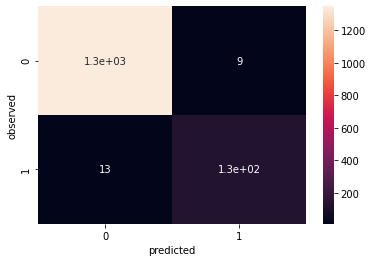

In [ ]:
matrix = confusion_matrix(Y_test,Y_pred2)
print(matrix)
sns.heatmap(matrix,annot=True)
plt.ylabel('observed')
plt.xlabel('predicted')

In [ ]:
print('train accuracy:',metrics.accuracy_score(Y_train,Y_pred1))
print("test accuracy :",metrics.accuracy_score(Y_test,Y_pred2))
print('Recall Score:', recall_score(Y_test,Y_pred2))
print('Precission score',precision_score(Y_test,Y_pred2))
print('ROC score:', roc_auc_score(Y_test,Y_pred2))
print('f1 score',f1_score(Y_test,Y_pred2))

train accuracy: 0.9877142857142858
test accuracy : 0.9853333333333333
Recall Score: 0.9097222222222222
Precission score 0.9357142857142857
ROC score: 0.9515425270403147
f1 score 0.9225352112676057


#5.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=10,oob_score=True,n_jobs=-1,random_state=3,max_features=None,min_samples_leaf=15)
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)

[[1347    9]
 [  13  131]]


Text(0.5, 15.0, 'predicted')

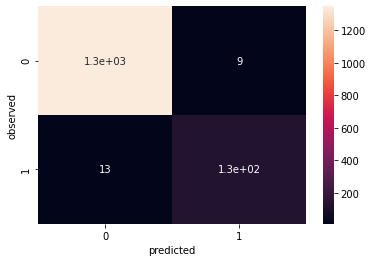

In [ ]:
matrix = confusion_matrix(Y_test,Y_pred2)
print(matrix)
sns.heatmap(matrix,annot=True)
plt.ylabel('observed')
plt.xlabel('predicted')

In [ ]:
print("accuracy :",metrics.accuracy_score(Y_test,Y_pred))
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test,Y_pred))
print('Recall Score:', recall_score(Y_test,Y_pred2))
print('Precission score',precision_score(Y_test,Y_pred2))
print('ROC score:', roc_auc_score(Y_test,Y_pred2))
print('f1 score',f1_score(Y_test,Y_pred2))

accuracy : 0.9826666666666667
Mean Absolute Error:  0.017333333333333333
Recall Score: 0.9097222222222222
Precission score 0.9357142857142857
ROC score: 0.9515425270403147
f1 score 0.9225352112676057


#6.Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svcl = SVC(kernel='linear')
svcl.fit(X_train, Y_train)
Y_pred1=svcl.predict(X_train)
Y_pred2=svcl.predict(X_test)

[[1342   14]
 [  60   84]]


Text(0.5, 15.0, 'predicted')

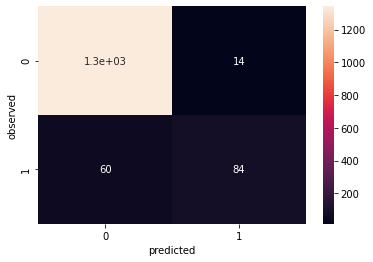

In [ ]:
matrix = confusion_matrix(Y_test,Y_pred2)
print(matrix)
sns.heatmap(matrix,annot=True)
plt.ylabel('observed')
plt.xlabel('predicted')

In [ ]:
print('train accuracy:',metrics.accuracy_score(Y_train,Y_pred1))
print("test accuracy :",metrics.accuracy_score(Y_test,Y_pred2))
print('Recall Score:', recall_score(Y_test,Y_pred2))
print('Precission score',precision_score(Y_test,Y_pred2))
print('ROC score:', roc_auc_score(Y_test,Y_pred2))
print('f1 score',f1_score(Y_test,Y_pred2))

train accuracy: 0.9548571428571428
test accuracy : 0.9506666666666667
Recall Score: 0.5833333333333334
Precission score 0.8571428571428571
ROC score: 0.7865044247787611
f1 score 0.6942148760330579


**From all the above algorithms i choose random forest is the best because it gives high accuracy and less error**

# business understanding of the model

Actually it is **classifier problem** since their are nonull values in the data cleaning becomes easy  From the plots we can observe that so many datas are **corelated** like **familly and income** ,**age and experience**,**ccavg and family**,**mortage and Education**

Since experience colum contains negative value we urge to drop it because it is highly **corelated** with age so we can say **higher the age higher the exoerience **then they the the loan so we drop it

We drop two other colums like **id and zip code** because they wont affect our output

From the **EDA** we conclude that some of the data colums like **mortgage ,income,CCAvg **are skewed so we apply** yeo johnson** power transformation to make it normal distribution

We need transformation because they affect the output if you see **higher the income higher the rate of taking loan in the same way higher the Education higher the loan taking rate like that CCAvg and mortgage also affect our output**

Mortage has huge data distribution means it contains nominal data we need to convert them to ordinal so we **label encoded** them using **bins **because we need all the data is normally distributed so we did this by label encoder using bins

**data with mean 0 and standar divation 1 are good ** like their is no fault in that to achive that we use **standard scaler** so that all the values are between 0 and 1 and the** mean is nearly set 0 and std is set to almost 1**

We split the data into test and train because to make the model not affected by the new data we dit this applying stratifier because out lot of data in y is 0 while spliting many 0's may go to train only to avoid that we use stratification

after that we apply algorithms like **logistic regression,SVM,random forest , Decision Tree,navis bayes** etc out of them we choose **random forest because it has high accuracy,roc score,recall,precision value,f1 score and less error** than others hence i choose that.


